In [1]:
import pandas as pd
import numpy as np
%config Completer.use_jedi=False

## Values considered “missing”
---

In [2]:
df = pd.DataFrame(
        np.random.randn(5, 3),
        index=["a", "c", "e", "f", "h"],
        columns=["one", "two", "three"],
    )
df

,one,two,three
a,-1.372802,0.558960,-0.457485
c,0.671291,0.803106,0.366099
e,-0.347530,0.896437,-0.638073
f,0.528943,0.241451,1.293936
h,0.816407,0.739518,-0.610585


In [3]:
df['four'] = 'bar'
df

,one,two,three,four
a,-1.372802,0.558960,-0.457485,bar
c,0.671291,0.803106,0.366099,bar
e,-0.347530,0.896437,-0.638073,bar
f,0.528943,0.241451,1.293936,bar
h,0.816407,0.739518,-0.610585,bar


In [4]:
df['five'] = df['one'] > 0
df

,one,two,three,four,five
a,-1.372802,0.558960,-0.457485,bar,False
c,0.671291,0.803106,0.366099,bar,True
e,-0.347530,0.896437,-0.638073,bar,False
f,0.528943,0.241451,1.293936,bar,True
h,0.816407,0.739518,-0.610585,bar,True


In [5]:
df2 = df.reindex(list('abcdefg'))
df2

,one,two,three,four,five
a,-1.372802,0.558960,-0.457485,bar,False
b,NaN,NaN,NaN,NaN,NaN
c,0.671291,0.803106,0.366099,bar,True
d,NaN,NaN,NaN,NaN,NaN
e,-0.347530,0.896437,-0.638073,bar,False
f,0.528943,0.241451,1.293936,bar,True
g,NaN,NaN,NaN,NaN,NaN


In [6]:
pd.isna(df2['one'])

a    False
b     True
c    False
d     True
e    False
f    False
g     True
Name: one, dtype: bool

In [7]:
pd.notna(df2['five'])

a     True
b    False
c     True
d    False
e     True
f     True
g    False
Name: five, dtype: bool

In [8]:
None == None

True

In [9]:
np.nan == np.nan

False

## Integer dtypes and missing data
---

In [10]:
pd.Series([1, 2, np.nan, 4], dtype=pd.Int64Dtype())

0       1
1       2
2    <NA>
3       4
dtype: Int64

## Datetimes
___

In [11]:
df2 = df.copy()
df2['timestamp'] = pd.Timestamp('20120101')
df2

,one,two,three,four,five,timestamp
a,-1.372802,0.558960,-0.457485,bar,False,2012-01-01
c,0.671291,0.803106,0.366099,bar,True,2012-01-01
e,-0.347530,0.896437,-0.638073,bar,False,2012-01-01
f,0.528943,0.241451,1.293936,bar,True,2012-01-01
h,0.816407,0.739518,-0.610585,bar,True,2012-01-01


In [12]:
 df2.loc[["a", "c", "h"], ["one", "timestamp"]] = np.nan

In [13]:
df2

,one,two,three,four,five,timestamp
a,NaN,0.558960,-0.457485,bar,False,NaT
c,NaN,0.803106,0.366099,bar,True,NaT
e,-0.347530,0.896437,-0.638073,bar,False,2012-01-01
f,0.528943,0.241451,1.293936,bar,True,2012-01-01
h,NaN,0.739518,-0.610585,bar,True,NaT


In [14]:
df2.dtypes.value_counts()

float64           3
datetime64[ns]    1
bool              1
object            1
dtype: int64

## Inserting missing data
---

In [15]:
s = pd.Series(list('abc'))
s.loc[0] = None
s.loc[1] = np.nan
s

0    None
1     NaN
2       c
dtype: object

## Calculations with missing data
---

In [16]:
df

,one,two,three,four,five
a,-1.372802,0.558960,-0.457485,bar,False
c,0.671291,0.803106,0.366099,bar,True
e,-0.347530,0.896437,-0.638073,bar,False
f,0.528943,0.241451,1.293936,bar,True
h,0.816407,0.739518,-0.610585,bar,True


In [17]:
df['one'].mean()

0.059261901895802584

## Sum/prod of empties/nans
---

In [18]:
pd.Series([np.nan]).sum()

0.0

In [19]:
pd.Series([], dtype="float64").sum()

0.0

In [20]:
pd.Series([np.nan]).prod()

1.0

In [21]:
pd.Series([], dtype="float64").prod()

1.0

## NA values in GroupBy
---
NA groups in GroupBy are automatically excluded. This behavior is consistent with R, for example:

## Cleaning / filling missing data
---

In [22]:
df2

,one,two,three,four,five,timestamp
a,NaN,0.558960,-0.457485,bar,False,NaT
c,NaN,0.803106,0.366099,bar,True,NaT
e,-0.347530,0.896437,-0.638073,bar,False,2012-01-01
f,0.528943,0.241451,1.293936,bar,True,2012-01-01
h,NaN,0.739518,-0.610585,bar,True,NaT


In [23]:
df2.fillna('Missing')

,one,two,three,four,five,timestamp
a,Missing,0.558960,-0.457485,bar,False,Missing
c,Missing,0.803106,0.366099,bar,True,Missing
e,-0.34753,0.896437,-0.638073,bar,False,2012-01-01 00:00:00
f,0.528943,0.241451,1.293936,bar,True,2012-01-01 00:00:00
h,Missing,0.739518,-0.610585,bar,True,Missing


In [24]:
df2['one'].fillna('Missing')

a     Missing
c     Missing
e    -0.34753
f    0.528943
h     Missing
Name: one, dtype: object

In [25]:
# Fill gaps forward or backward
df2.fillna(method='pad')

,one,two,three,four,five,timestamp
a,NaN,0.558960,-0.457485,bar,False,NaT
c,NaN,0.803106,0.366099,bar,True,NaT
e,-0.347530,0.896437,-0.638073,bar,False,2012-01-01
f,0.528943,0.241451,1.293936,bar,True,2012-01-01
h,0.528943,0.739518,-0.610585,bar,True,2012-01-01


In [26]:
# Limit the amount of filling
df2.fillna(method="pad", limit=1)

,one,two,three,four,five,timestamp
a,NaN,0.558960,-0.457485,bar,False,NaT
c,NaN,0.803106,0.366099,bar,True,NaT
e,-0.347530,0.896437,-0.638073,bar,False,2012-01-01
f,0.528943,0.241451,1.293936,bar,True,2012-01-01
h,0.528943,0.739518,-0.610585,bar,True,2012-01-01


## Filling with a PandasObject
---

In [27]:
dff = pd.DataFrame(np.random.randn(10, 3), columns=list("ABC"))
dff.iloc[3:5, 0] = np.nan
dff.iloc[4:6, 1] = np.nan
dff.iloc[5:8, 2] = np.nan
dff

,A,B,C
0,-0.348399,0.171915,-1.606596
1,-1.160937,-1.462365,1.241937
2,1.052016,-0.876731,0.538365
3,NaN,0.176026,-0.509579
4,NaN,NaN,-0.112271
5,0.109737,NaN,NaN
6,-0.009175,0.802400,NaN
7,0.502947,-1.106359,NaN
8,0.309220,-0.119805,-0.704090
9,1.247343,1.464730,1.876634


In [28]:
print(dff.mean())
dff.fillna(dff.mean())

A    0.212844
B   -0.118774
C    0.103486
dtype: float64


,A,B,C
0,-0.348399,0.171915,-1.606596
1,-1.160937,-1.462365,1.241937
2,1.052016,-0.876731,0.538365
3,0.212844,0.176026,-0.509579
4,0.212844,-0.118774,-0.112271
5,0.109737,-0.118774,0.103486
6,-0.009175,0.802400,0.103486
7,0.502947,-1.106359,0.103486
8,0.309220,-0.119805,-0.704090
9,1.247343,1.464730,1.876634


In [29]:
dff.fillna(dff.mean()["B":"C"])

,A,B,C
0,-0.348399,0.171915,-1.606596
1,-1.160937,-1.462365,1.241937
2,1.052016,-0.876731,0.538365
3,NaN,0.176026,-0.509579
4,NaN,-0.118774,-0.112271
5,0.109737,-0.118774,0.103486
6,-0.009175,0.802400,0.103486
7,0.502947,-1.106359,0.103486
8,0.309220,-0.119805,-0.704090
9,1.247343,1.464730,1.876634


In [30]:
pd.notna(dff)

,A,B,C
0,True,True,True
1,True,True,True
2,True,True,True
3,False,True,True
4,False,False,True
5,True,False,False
6,True,True,False
7,True,True,False
8,True,True,True
9,True,True,True


In [31]:
print(dff.mean())
dff.where(pd.notna(dff), dff.mean(), axis="columns")

A    0.212844
B   -0.118774
C    0.103486
dtype: float64


,A,B,C
0,-0.348399,0.171915,-1.606596
1,-1.160937,-1.462365,1.241937
2,1.052016,-0.876731,0.538365
3,0.212844,0.176026,-0.509579
4,0.212844,-0.118774,-0.112271
5,0.109737,-0.118774,0.103486
6,-0.009175,0.802400,0.103486
7,0.502947,-1.106359,0.103486
8,0.309220,-0.119805,-0.704090
9,1.247343,1.464730,1.876634


## Dropping axis labels with missing data: dropna
---

In [32]:
dff1 = dff.copy()
dff1['A'] = np.nan
dff1

,A,B,C
0,NaN,0.171915,-1.606596
1,NaN,-1.462365,1.241937
2,NaN,-0.876731,0.538365
3,NaN,0.176026,-0.509579
4,NaN,NaN,-0.112271
5,NaN,NaN,NaN
6,NaN,0.802400,NaN
7,NaN,-1.106359,NaN
8,NaN,-0.119805,-0.704090
9,NaN,1.464730,1.876634


In [33]:
dff1.dropna(axis=0)

,A,B,C


In [34]:
df.dropna(axis=1)

,one,two,three,four,five
a,-1.372802,0.558960,-0.457485,bar,False
c,0.671291,0.803106,0.366099,bar,True
e,-0.347530,0.896437,-0.638073,bar,False
f,0.528943,0.241451,1.293936,bar,True
h,0.816407,0.739518,-0.610585,bar,True


In [35]:
dff1['A'].dropna()

Series([], Name: A, dtype: float64)

## Interpolation
---

In [36]:
index = pd.DatetimeIndex(pd.date_range(start='20000101', periods=100, freq='M'))
index.value_counts()
data = pd.Series(np.random.randint(1000, size=(100)))
dfi = pd.DataFrame(np.random.randn(100,1), index=index)
dfi

,0
2000-01-31,0.257447
2000-02-29,0.619781
2000-03-31,-1.699164
2000-04-30,-1.545033
2000-05-31,0.999240
...,...
2007-12-31,0.266244
2008-01-31,-0.561701
2008-02-29,0.638106
2008-03-31,1.055963


<AxesSubplot:>

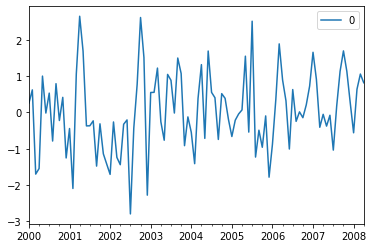

In [37]:
dfi.plot()

<AxesSubplot:>

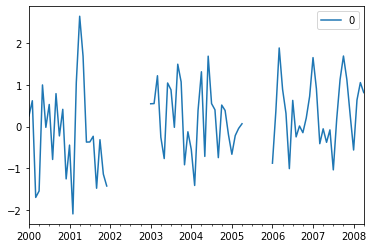

In [77]:
dfim = dfi.copy()
dfim.loc['2002-01-01':'2003-01-1'] = None
dfim.loc['2005-05-01':'2006-01-1'] = None
# dfim = dfim.drop(dfim.loc['2005-01-01':'2006-01-1'].index)
# dfim.drop(dfim[dfim.index.year==2000], axis=1)
# dfim.plot()
dfim.plot()

<AxesSubplot:>

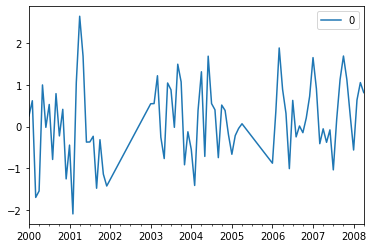

In [79]:
dfim.interpolate().plot()

## Interpolation limits
---

In [81]:
ser = pd.Series([np.nan, np.nan, 5, np.nan, np.nan, np.nan, 13, np.nan, np.nan])
ser

0     NaN
1     NaN
2     5.0
3     NaN
4     NaN
5     NaN
6    13.0
7     NaN
8     NaN
dtype: float64

In [82]:
ser.interpolate()

0     NaN
1     NaN
2     5.0
3     7.0
4     9.0
5    11.0
6    13.0
7    13.0
8    13.0
dtype: float64

In [84]:
ser.interpolate(limit=1)

0     NaN
1     NaN
2     5.0
3     7.0
4     NaN
5     NaN
6    13.0
7    13.0
8     NaN
dtype: float64

## Replacing generic values
---

In [85]:
ser = pd.Series([0.0, 1.0, 2.0, 3.0, 4.0])
ser

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [87]:
ser.replace(0, 5)

0    5.0
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [88]:
ser.replace([0, 1, 2, 3, 4], [4, 3, 2, 1, 0])

0    4.0
1    3.0
2    2.0
3    1.0
4    0.0
dtype: float64

In [89]:
ser.replace({0: 10, 1: 100})

0     10.0
1    100.0
2      2.0
3      3.0
4      4.0
dtype: float64

In [90]:
df = pd.DataFrame({"a": [0, 1, 2, 3, 4], "b": [5, 6, 7, 8, 9]})
df.replace({"a": 0, "b": 5}, 100)

,a,b
0,100,100
1,1,6
2,2,7
3,3,8
4,4,9


In [91]:
ser.replace([1, 2, 3], method="pad")

0    0.0
1    0.0
2    0.0
3    0.0
4    4.0
dtype: float64

## String/regular expression replacement
---

In [92]:
d = {"a": list(range(4)), "b": list("ab.."), "c": ["a", "b", np.nan, "d"]}
df= pd.DataFrame(d)
df

,a,b,c
0,0,a,a
1,1,b,b
2,2,.,NaN
3,3,.,d


In [93]:
df.replace('.', np.nan)

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


In [94]:
df.replace(r"\s*\.\s*", np.nan, regex=True)

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


## Numeric replacement
---

In [95]:
df = pd.DataFrame(np.random.randn(10, 2))
df[np.random.rand(df.shape[0]) > 0.5] = 1.5
df.replace(1.5, np.nan)

,0,1
0,1.261748,-2.355141
1,-0.943903,1.249924
2,NaN,NaN
3,-2.102515,-0.864415
4,NaN,NaN
5,-2.060479,1.648187
6,NaN,NaN
7,-0.038579,0.113292
8,NaN,NaN
9,NaN,NaN
